# mom6_bathy Notebook Gallery
## Coarsen an existing MOM6 grid

In this notebook, we create a coarse versions of an existing MOM6 grid, tx2_3v2.
Setting CX=5 below results in a grid with ~3 degree resolution, while setting it to
15 results in a grid with ~10 degree resolution. 

In [1]:
# CX: Coarsening factor

# CX, grid_name = 15, 'tx10deg'  # 10-degree resolution
CX, grid_name = 5, 'tx3deg'  # 3-degree resolution

## 1. Import Modules

In [2]:
%%capture
import xarray as xr
from datetime import datetime
from mom6_bathy.grid import Grid
from mom6_bathy.topo import Topo

In [3]:
datestamp = datetime.now().strftime('%Y%m%d')

## 2. Create a MOM6 grid object from an existing supergrid

tx2_3v2 is the current MOM6-CESM workhorse grid (0.66deg, tripolar).

In [4]:
grid_orig = Grid.from_supergrid('/glade/p/cesmdata/inputdata/ocn/mom/tx2_3v2/ocean_hgrid_221123.nc')

## 3. Read the bathymetry

In [5]:
topo_orig = Topo.from_topo_file(grid_orig, '/glade/p/cesmdata/inputdata/ocn/mom/tx2_3v2/ocean_topo_tx2_3v2_240501.nc')

## 3. Coarsen the grid and topography:

In [6]:
topo = topo_orig[::CX, ::CX]
grid = topo._grid

In [7]:
topo.depth.shape

(96, 108)

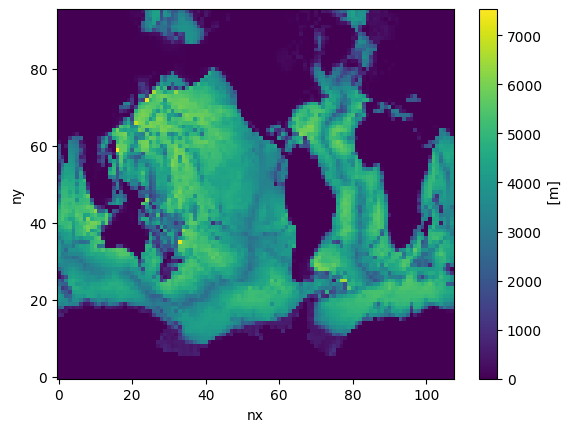

In [8]:
topo.depth.plot()

## 4. Modify Depth

**Important:** After coarsening the grid, use the Topo Editor widget to erase disconnected basins.
Carefully inspect the domain and make necessary adjustments to ensure physical consistency. For example, you may need to connect North and South America to prevent unintended ocean passages or isolated water bodies.

In [9]:
%matplotlib ipympl
from mom6_bathy.topo_editor import TopoEditor
TopoEditor(topo)

TopoEditor(children=(VBox(children=(HTML(value='<h2>Topo Editor</h2>'), HTML(value='<hr><h3>Display</h3>'), To…

## 5. Save the grid and bathymetry files

In [10]:
# MOM6 supergrid file:
grid.write_supergrid(f"./ocean_hgrid_{grid_name}_{datestamp}.nc")

# MOM6 topography file:
topo.write_topo(f"./ocean_topog_{grid_name}_{datestamp}.nc")

# CICE grid file:
topo.write_cice_grid(f"./cice_grid_{grid_name}_{datestamp}.nc")

# SCRIP grid file (for runoff remapping, if needed):
topo.write_scrip_grid(f"./scrip_grid_{grid_name}_{datestamp}.nc")

# ESMF mesh file:
topo.write_esmf_mesh(f"./ESMF_mesh_{grid_name}_{datestamp}.nc")

In [11]:
# Also coarsen chlorophyl and salt restoring input files:

chl_orig = xr.open_dataset('/glade/p/cesmdata/inputdata/ocn/mom/tx2_3v2/seawifs-clim-1997-2010-tx2_3v2.230416.nc')
chl = chl_orig.isel(LON=slice(0, -1, CX), LAT=slice(0, -1, CX))
chl.to_netcdf(f"./seawifs-clim-1997-2010-{grid_name}_{datestamp}.nc")

salt_orig = xr.open_dataset('/glade/p/cesmdata/inputdata/ocn/mom/tx2_3v2/state_restore_tx2_3_20230416.nc')
salt = salt_orig.isel(LON=slice(0, -1, CX), LAT=slice(0, -1, CX)) 
salt.to_netcdf(f"./state_restore_{grid_name}_{datestamp}.nc")